In [2]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#从文件名提取温度with regular expression
path = r'C:\Users\Dev\Desktop\MPhil-Zipeng Liu\Paperwork\Experiments\US-BTO\Following up with Gian\Sn0\20kvcm\PE loop-heating-20kvcm'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".tab"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[299.98, 299.99, 300.03, 300.95, 301.95, 302.88, 303.82, 304.77, 305.68, 306.5, 307.54, 308.43, 309.36, 310.21, 311.12, 312.06, 313.1, 313.9, 314.8, 315.59, 316.61, 317.57, 318.41, 319.44, 320.47, 321.15, 322.06, 323.08, 324.02, 324.89, 325.73, 326.8, 327.67, 328.61, 329.3, 330.48, 331.05, 332.08, 332.94, 333.97, 335.08, 335.77, 336.8, 337.85, 338.49, 339.45, 340.15, 341.25, 342.05, 342.98, 344.25, 344.79, 345.75, 346.7, 347.6, 348.5, 349.13, 350.44, 351.16, 352.56, 353.33, 353.96, 354.8, 355.83, 356.63, 357.56, 358.69, 359.27, 360.6, 361.16, 362.31, 363.06, 363.87, 365.1, 365.75, 366.7, 367.8, 368.89, 369.49, 370.53, 371.08, 372.37, 373.31, 374.17, 374.82, 375.8, 377.13, 377.79, 378.46, 379.71, 380.49, 381.17, 382.57, 383.34, 383.9, 384.86, 385.64, 387.26, 388.08, 388.47, 389.82, 390.38, 391.03, 392.17, 393.48, 394.06, 394.65, 395.9, 397.17, 397.94, 398.76, 399.8, 400.23]


             E      P_SI
250  1957212.0  0.213493
251  1963479.0  0.213924
252  1971654.0  0.214094


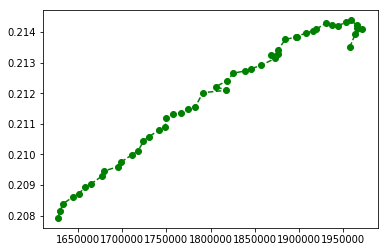

In [13]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\Users\Dev\Desktop\MPhil-Zipeng Liu\Paperwork\Experiments\US-BTO\Following up with Gian\Sn0\20kvcm\PE loop-heating-20kvcm\299.98.tab',delimiter='\t')
df.head
#选取PE loop 的upper branch的右端做fitting，整个loop1000个点，upperbranch 250个点，再取50个点做外推
df_PE=df.iloc[250:300, [1,5]]
print(df_PE.head(3))
plt.plot(df_PE['E'], df_PE['P_SI'],'go--') 
plt.show()

In [17]:
#用sklearn的函数做linear regression
fittingMatrix=np.matrix(df_PE)
X=fittingMatrix[:,0]
Y=fittingMatrix[:,1]
mdl= LinearRegression().fit(X,Y)
a = mdl.coef_[0]
b = mdl.intercept_
print(a[0])
print(b[0])
# print(X,Y)

1.82420783799e-08
0.178876576773


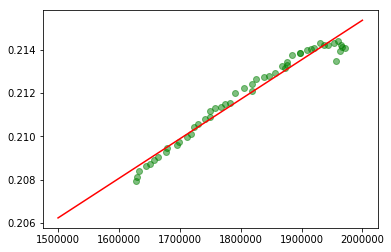

In [21]:
##画fitting line
xx=np.arange(1500000,2000000, 100)
yy=list()
for ii in xx:
    y=ii*a+b
    yy.append(y)
plt.plot(xx,yy,"r")
#画PE loop的散点图
plt.scatter([X],[Y],c='g',alpha=0.5)
plt.show()

In [22]:
#批量操作所有文件
# files = glob.glob(path + "/*.tab")
files = glob(path + "/*.tab")
lst_a=list()
lst_b=list()
lst_T=list()
for file in files:
    df = pd.read_csv(file,delimiter='\t')
    df_PE=df.iloc[250:300, [1,5]]
    fittingMatrix=np.matrix(df_PE)
    X=fittingMatrix[:,0]
    Y=fittingMatrix[:,1]
    mdl= LinearRegression().fit(X,Y)
    a = mdl.coef_[0]
    b = mdl.intercept_
    lst_a.append(a[0])
    lst_b.append(b[0])
# print(lst_a)
# print("!!!!!!!!!!!!!!!!!!!!!!!!!!")
# print(lst_b)
# print(lst_T)

In [38]:
#将list转化成dictionary，然后转化成DataFrame
dic={"a":lst_a,
  "b":lst_b,
  "T":temperature}
dt=pd.DataFrame(dic)
print(dt.head(3))

P_0_SI = dt["a"] *0*100000+ dt["b"]
P_5_SI = dt["a"] *5*100000+ dt["b"]
P_10_SI = dt["a"] *10*100000+ dt["b"]
P_15_SI = dt["a"] *15*100000+ dt["b"]
P_20_SI = dt["a"] *20*100000+ dt["b"]

dt.insert(len(dt.columns), "P_0_SI", P_0_SI)
dt.insert(len(dt.columns), "P_5_SI", P_5_SI)
dt.insert(len(dt.columns), "P_10_SI", P_10_SI)
dt.insert(len(dt.columns), "P_15_SI", P_15_SI)
dt.insert(len(dt.columns), "P_20_SI", P_20_SI)

#convert the SI unit into kV/cm
P_0 = 100*P_0_SI
P_5 = 100*P_5_SI
P_10 = 100*P_10_SI
P_15 = 100*P_15_SI
P_20 = 100*P_20_SI

dt.insert(len(dt.columns), "P_0", P_0)
dt.insert(len(dt.columns), "P_5", P_5)
dt.insert(len(dt.columns), "P_10", P_10)
dt.insert(len(dt.columns), "P_15", P_15)
dt.insert(len(dt.columns), "P_20", P_20)

dt.head(3)
# dt.to_csv(r'C:\Users\Dev\Desktop\MPhil-Zipeng Liu\Paperwork\Experiments\US-BTO\Following up with Gian\Sn0\20kvcm\PE loop-heating-20kvcm\Extropolated PT at E.csv')

        T             a         b
0  299.98  1.824208e-08  0.178877
1  299.99  1.839250e-08  0.178130
2  300.03  1.914498e-08  0.178452


,T,a,b,P_0_SI,P_5_SI,P_10_SI,P_15_SI,P_20_SI,P_0,P_5,P_10,P_15,P_20
0,299.98,1.824208e-08,0.178877,0.178877,0.187998,0.197119,0.206240,0.215361,17.887658,18.799762,19.711866,20.623969,21.536073
1,299.99,1.839250e-08,0.178130,0.178130,0.187326,0.196523,0.205719,0.214915,17.813000,18.732625,19.652250,20.571875,21.491500
2,300.03,1.914498e-08,0.178452,0.178452,0.188025,0.197597,0.207170,0.216742,17.845233,18.802482,19.759731,20.716979,21.674228
